## Torch implementation of VAE

> VAE stands for Variational Autoencoders


Follow Readme.md for installation

## Load library

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn.functional as F

from algorithms.vae_model import VAE

## Learn more [here](https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73) before continuing

## Load data and split into train and test set

In [2]:
import torchvision.datasets as datasets

In [3]:
mnist_trainset = datasets.MNIST(root='./dataset', train=True, download=True, transform=None)

In [4]:
len(mnist_trainset)

60000

In [5]:
mnist_trainset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F07D30C67C0>, 5)

In [6]:
from PIL import Image

First image of our dataset

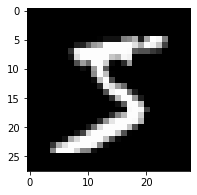

In [7]:
plt.figure(figsize=(3, 3))
plt.imshow(mnist_trainset[0][0], cmap='gray')
plt.show()

Let visualize another example

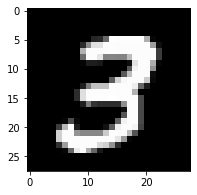

In [8]:
plt.figure(figsize=(3, 3))
plt.imshow(mnist_trainset[7][0], cmap='gray')
plt.show()

In [9]:
mnist_testset = datasets.MNIST(root='./dataset', train=False, download=True, transform=None)

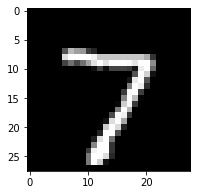

In [10]:
plt.figure(figsize=(3, 3))
plt.imshow(mnist_testset[0][0], cmap='gray')
plt.show()

Print part of our first test image

In [11]:
print(np.array(mnist_trainset[10][0])[10:20, 10:20])

[[  0   0   0  24 209 254 254 254 171   0]
 [  0   0  91 137 253 254 254 254 112   0]
 [ 40 214 250 254 254 254 254 254  34   0]
 [ 81 247 254 254 254 254 254 254 146   0]
 [  0 110 246 254 254 254 254 254 171   0]
 [  0   0  73  89  89  93 240 254 171   0]
 [  0   0   0   0   0   1 128 254 219  31]
 [  0   0   0   0   0   7 254 254 214  28]
 [  0   0   0   0   0 138 254 254 116   0]
 [  0   0   0   0  25 240 254 254  34   0]]


In [12]:
X_train = np.array([
    np.array(data)/255 for data, _ in mnist_trainset
])
data_dim = 28*28 # each image is size 28 * 28

In [13]:
X_test = np.array([
    np.array(data)/255 for data, _ in mnist_testset
])

In [14]:
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)

In [15]:
if torch.cuda.is_available():
    print('You use GPU !')
    device = torch.device('cuda')
else:
    print('You use CPU !')
    device = torch.device('cpu')

You use GPU !


## Model configuration

In [16]:
in_dim = 28*28 # each image is size 28 * 28
encoder_width = [128, 64]
decoder_width = [64, 128]
latent_dim = 32

In [17]:
batch_size=256
max_epoch=100
lr= 0.001
weight_decay = 0.0075

In [18]:
data = next(iter(X_train))
data.size()


torch.Size([28, 28])

## Train

In [19]:
# config model
model = VAE(X_train, X_test, in_dim, encoder_width, decoder_width, latent_dim, device)
# train VAE
hist_loss = model.train(batch_size, max_epoch, lr, weight_decay)

100%|██████████| 100/100 [01:21<00:00,  1.23it/s, val_loss=105, epoch=99]


## A look at encoder/decoder architecture

![](https://miro.medium.com/max/1400/1*Q5dogodt3wzKKktE0v3dMQ@2x.png)

In [20]:
print(model.encoder)

Encoder(
  (base_model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): SELU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): SELU()
  )
  (latent_mean): Linear(in_features=64, out_features=32, bias=True)
  (latent_std): Linear(in_features=64, out_features=32, bias=True)
)


In [21]:
print(model.decoder)

Decoder(
  (model): Sequential(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): SELU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): SELU()
    (4): Linear(in_features=128, out_features=784, bias=True)
  )
)


Save loss history

In [22]:
np.savetxt('./dataset/loss.csv', hist_loss, delimiter=',')

## Generate new data

Let generate an example

In [23]:
X_generated = model.generate_from_latent_space(1)

In [24]:
X_generated[0].size() # generated image is a size of input image

torch.Size([28, 28])

Visualize generated with matplotly

Seem like 7 -:)

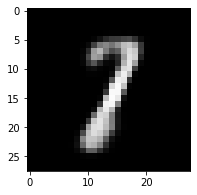

In [25]:
image = Image.fromarray((X_generated[0]*255).cpu().detach().numpy())
plt.figure(figsize=(3, 3))
plt.imshow(image, cmap='gray')
plt.show()

Let generate 50 examples

In [26]:
X_generated = model.generate_from_latent_space(50) # generer 50 images

Random visualize 16 of these

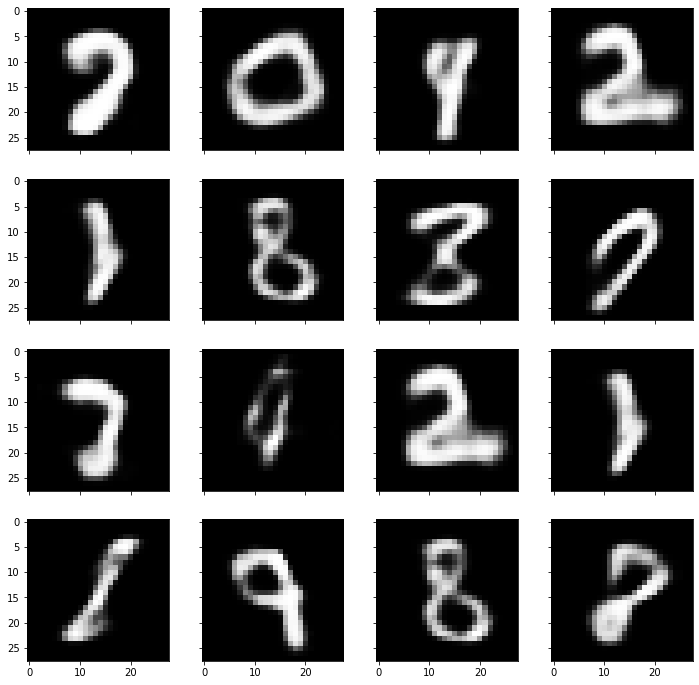

In [29]:
image_index = np.random.choice(50, 16)

fig, axis = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True, figsize=(12, 12))
selected_images = X_generated[image_index].cpu().detach().numpy()
for i in range(4):
    for j in range(4):
        image = selected_images[i*4+j]
        axis[i, j].imshow(image, cmap='gray')
plt.show()

Let generate image from example

In [30]:
data_input, X_generated = model.generate_from_test_data(2) # generer 2 images

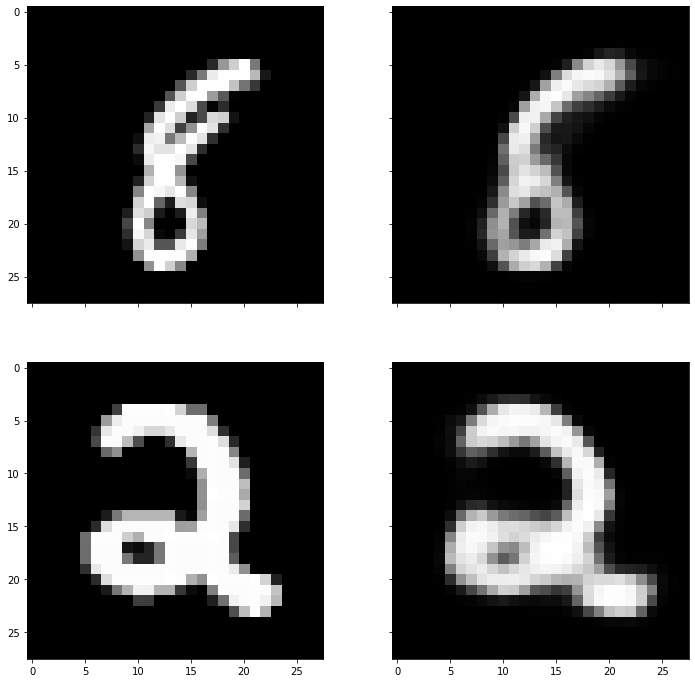

In [31]:
fig, axis = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(12, 12))

image = data_input[0].cpu().detach().numpy()
axis[0, 0].imshow(image, cmap='gray')

image = X_generated[0].cpu().detach().numpy()
axis[0, 1].imshow(image, cmap='gray')

image = data_input[1].cpu().detach().numpy()
axis[1, 0].imshow(image, cmap='gray')

image = X_generated[1].cpu().detach().numpy()
axis[1, 1].imshow(image, cmap='gray')

plt.show()

Forked Source Code [here](https://github.com/shib0li/VAE-torch)